In [1]:
#interactive plotting in separate window
#%matplotlib qt 
%matplotlib inline 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import curve_fit

In [3]:
#reading data
data_df = pd.read_csv('data/sE150T1p6_map_E=minus50-150_q=0-18.txt', comment = "#")

In [4]:
#saving df columns in array
Q_arr = data_df["Q"].to_numpy() 
E_arr = data_df["E"].to_numpy() 
S_arr = data_df["S"].to_numpy() 
S_E_arr = data_df["S_E"].to_numpy()

#delete duplicate values due to grid structure
Q_arr = np.unique(Q_arr)
E_arr = np.unique(E_arr)

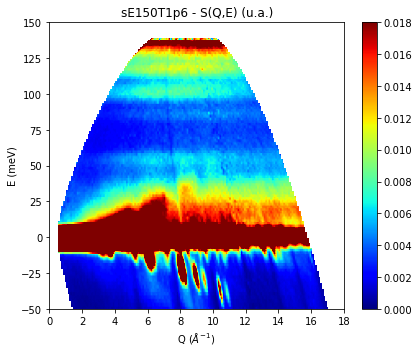

In [4]:
#plotting
x= Q_arr
y= E_arr
z = S_arr
Z = z.reshape(len(x), len(y))
Z = Z.transpose()
Z = np.flipud(Z)

fig =plt.figure(figsize=(6, 5))
plt.imshow(Z, aspect='auto', extent = [0,18,-50,150], vmin=0,vmax = 0.018, cmap='jet')# X, Y, Z,5000,vmin=0,vmax = 0.43, cmap='jet')
plt.colorbar()
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('E (meV)')
plt.title('sE150T1p6 - S(Q,E) (u.a.)')
plt.tight_layout()
plt.show()
fig.savefig('./figures/sE150T1p6.png')

In [5]:
#reading data
phonon_df = pd.read_csv('data/cut_sE150T1p6_E_85_dE_10.dat')
phonon_df = phonon_df.dropna()

In [6]:
#fit function of Escan
def fit_func(x, a, b,c):
    return a+b*x**2*np.exp(-c*x**2)

---------------------------
Best fit values
---------------------------
a = 0.05407112576568159 +- 0.0007907507071542787
b = 0.0027438424125869718 +- 4.531500751545767e-05
c = 0.011024757632724286 +- 8.129897613323028e-05
---------------------------


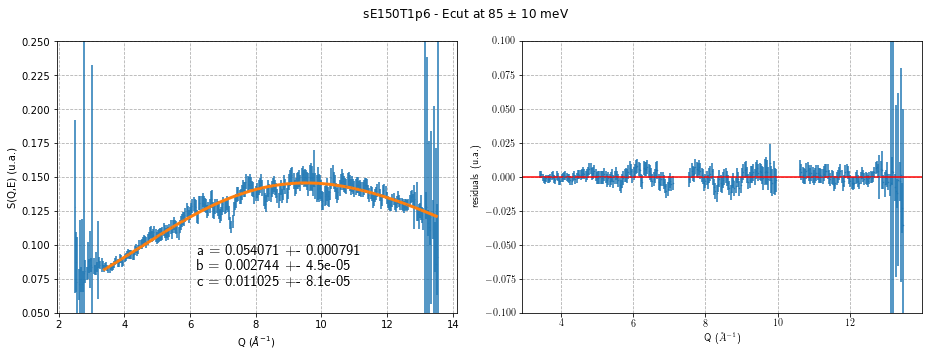

In [7]:
Qph_arr = phonon_df["X"].to_numpy() 
Sph_arr = phonon_df["Y"].to_numpy() 
Sph_err = phonon_df["E"].to_numpy() 

#selecting only part of the data
Qph_fit = []
Sph_fit = []
SphErr_fit = []
for Q, S, Serr in zip(Qph_arr, Sph_arr, Sph_err):
    if (Q> 3.4 and Q<13.5) and (Q<7.12 or Q>7.51) and (Q<9.99 or Q>10.61) :
        Qph_fit.append(Q)
        Sph_fit.append(S)
        SphErr_fit.append(Serr)
        
#estimate fit parameters################################### 
guessP = [0.025, 0.027, 0.03]
popt, pcov = curve_fit(fit_func, Qph_fit, Sph_fit, guessP, SphErr_fit, bounds=((0, 0, 0), (np.inf, np.inf, np.inf)))

#calculate estimated S values###############################
Sph_est = []
Sph_ex = []
Q_ex = np.linspace(3.4,13.5,1000)
for Q in Qph_fit:
    Sph_est.append(fit_func(Q, *popt))
for Q in Q_ex:
    Sph_ex.append(fit_func(Q, *popt))
    
#residuals##################################################
res = []
#chisq=0
for Q, S in zip(Qph_fit,Sph_fit):
    res.append(S-fit_func(Q, *popt))
    #chisq+=(res[-1]/err)**2
    
#plot results###############################################

print("---------------------------")
print("Best fit values")
print("---------------------------")
print("a =", popt[0],"+-",np.sqrt(np.diag(pcov)[0]))
print("b =", popt[1],"+-",np.sqrt(np.diag(pcov)[1]))
print("c =", popt[2],"+-",np.sqrt(np.diag(pcov)[2]))
print("---------------------------")
#print("---------------------------")
#print("Fit parameters")
#print("---------------------------")
#print("chisquared =",chisq)
#print("---------------------------")
from numpy import sqrt, diag

#plotting 
fig =plt.figure(figsize=(13, 5))
plt.suptitle(" sE150T1p6 - Ecut at 85 $\pm$ 10 meV")
ax = plt.subplot(1, 2, 1)
plt.grid(linestyle='--')
#plt.rc("figure", facecolor="w")
plt.rc('text', usetex=True)
#plt.rc('font', family='serif',size = 12)    
plt.ylabel('S(Q,E) (u.a.)')
plt.xlabel('Q ($\AA^{-1}$)')
plt.errorbar(Qph_arr, Sph_arr, Sph_err, fmt='o', markersize = 0.1)
plt.plot(Q_ex, Sph_ex, linewidth=3)
textstr = '\n'.join((
   "a = "+str(np.round(popt[0],6))+" +- "+str(round(sqrt(diag(pcov)[0]),6)),
    "b = "+str(np.round(popt[1],6))+" +- "+str(round(sqrt(diag(pcov)[1]),6)),
    "c = "+str(np.round(popt[2],6))+" +- "+str(round(sqrt(diag(pcov)[2]),6))
   ))
ax.text(0.35, 0.25, textstr, transform=ax.transAxes, fontsize=15,
        verticalalignment='top')
plt.ylim([0.05,0.25])



plt.subplot(1, 2, 2)
plt.grid(linestyle='--')
plt.errorbar(Qph_fit, res, SphErr_fit, fmt='o', markersize = 0.5)
#plt.rc("figure", facecolor="w")
plt.rc('text', usetex=True)
#plt.rc('font', family='serif',size = 16) 
plt.axhline(0, color='r')
plt.ylabel('residuals (u.a.)')
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylim([-0.1,0.1])
plt.tight_layout()
plt.show()
#fig.savefig('./figures/sE150T1p6_Ecut.png')

In [8]:
S_arr2D = S_arr.reshape(len(Q_arr), len(E_arr))
S_arr2D = S_arr2D.transpose()
S_arr2D = np.flipud(S_arr2D)

In [9]:
S_int = []
for E_idx in range(S_arr2D.shape[0]):
    S_sum = 0
    for Q_idx in range(S_arr2D.shape[1]):
        if Q_arr[Q_idx]>6.2 and Q_arr[Q_idx]<7.8 :
            S_sum += S_arr2D[E_idx][Q_idx]
    S_int.append(S_sum)  
S_int = np.flip(S_int)

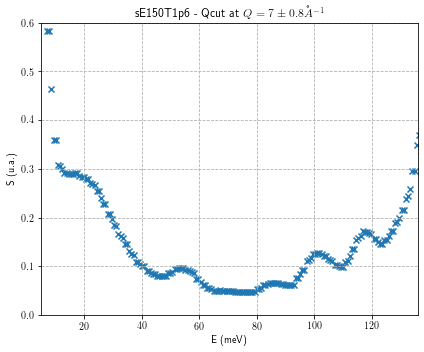

In [11]:
fig =plt.figure(figsize=(6, 5))
plt.grid(linestyle='--')
plt.title('sE150T1p6 - Qcut at $Q = 7 \pm 0.8 \AA ^{-1}$')  
plt.ylabel('S (u.a.)')
plt.xlabel('E (meV)')
plt.scatter(E_arr, S_int, marker = 'x')
plt.xlim([5,136])
plt.ylim([0,0.6])
plt.tight_layout()
plt.show()
fig.savefig('./figures/sub_sE150T1p6_Qcut.png')

In [12]:
minimum = abs(Q_arr-7).min()
idx_7 = np.where(abs(Q_arr-7) == minimum)[0][0]

S_7 = []
for E_idx in range(S_arr2D.shape[0]):
    S_7.append(S_arr2D[E_idx][idx_7])
S_7 = np.flip(S_7)

In [13]:
ratio = []
for i in range(len(S_7)):
    if E_arr[i] < 136 and E_arr[i]>14 :
        if not (pd.isna(S_int[i]) or pd.isna(S_7[i])):
            ratio.append(S_int[i]/S_7[i])
ratio = np.array(ratio)
print(ratio.mean(), ratio.std())

15.895854991813287 1.0237912524088566


In [14]:
scaling_factors = fit_func(Q_arr, *popt)
minimum = abs(Q_arr-7).min()
idx = np.where(abs(Q_arr-7) == minimum)[0][0]

scaling_factors /= scaling_factors[idx]

In [15]:
from scipy import interpolate

def S_splined(E, E_arr, S_arr):
    tck = interpolate.splrep(E_arr, S_arr)
    return float(interpolate.splev(E, tck))

In [16]:
def intensity(Q, S, Q_arr, E_arr, scaling_factors):
    idx_Q = np.where(Q_arr == Q)[0][0]
    intens =  S*scaling_factors[idx_Q]
    return intens

In [17]:
S_mask = []

E_lim = []
S_int_lim = []
for E, S in zip(E_arr, S_int):
    if  (E>14 and E<136):
        if not (pd.isna(E) or pd.isna(S)):
            E_lim.append(E)
            S_int_lim.append(S)
        
E_lim = np.array(E_lim)
S_int_lim = np.array(S_int_lim)

        
for Q in Q_arr:
    for E in E_arr:
        if  (E>14 and E<126):
            S = S_splined(E, E_lim, S_int_lim)
            S_mask.append(intensity(Q, S, Q_arr, E_lim, scaling_factors))
        else :
            S_mask.append(0)

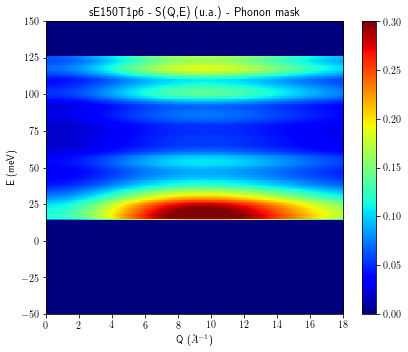

In [18]:
x= Q_arr
y= E_arr
z = np.array(S_mask)
X, Y = np.meshgrid(x, y)
Z = z.reshape(len(x), len(y))
Z = Z.transpose()
Z = np.flipud(Z)
#x = x.transpose()
fig =plt.figure(figsize=(6, 5))
plt.imshow(Z, aspect='auto', extent = [min(x),max(x),min(y),max(y)], vmin=0,vmax = 0.30, cmap='jet')
#plt.contour(X, Y, Z,1000,vmin=0,vmax=0.84,cmap='jet')
plt.colorbar()
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('E (meV)')
plt.title('sE150T1p6 - S(Q,E) (u.a.) - Phonon mask')
plt.tight_layout()
plt.show()
fig.savefig('./figures/sE150T1p6_mask.png')

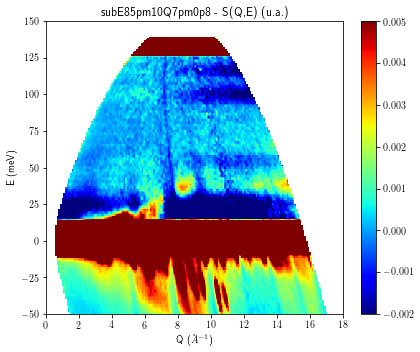

In [20]:
S_mask = np.array(S_mask)
S_arr1 = S_arr-S_mask/ratio.mean()

x= Q_arr
y= E_arr
z = S_arr1
X, Y = np.meshgrid(x, y)
Z = z.reshape(len(x), len(y))
Z = Z.transpose()
Z = np.flipud(Z)
fig =plt.figure(figsize=(6, 5))
plt.imshow(Z, aspect='auto', extent = [0,18,-50,150], vmin=-0.002,vmax = 0.005, cmap='jet')# X, Y, Z,5000,vmin=0,vmax = 0.43, cmap='jet')
plt.colorbar()
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('E (meV)')
plt.title('subE85pm10Q7pm0p8 - S(Q,E) (u.a.)')
plt.tight_layout()
plt.show()
fig.savefig('./figures/sub_sE150T1p6.png')

In [70]:
S_arr2D = S_arr.reshape(len(Q_arr), len(E_arr))
S_arr2D = S_arr2D.transpose()
S_arr2D = np.flipud(S_arr2D)

In [71]:
S_int = []
for E_idx in range(S_arr2D.shape[0]):
    S_sum = 0
    for Q_idx in range(S_arr2D.shape[1]):
        if Q_arr[Q_idx]>8 and Q_arr[Q_idx]<12 :
            S_sum += S_arr2D[E_idx][Q_idx]
    S_int.append(S_sum)  
S_int = np.flip(S_int)

In [72]:
S_mask = np.array(S_mask)
S_arr2D_mask = S_mask.reshape(len(Q_arr), len(E_arr))
S_arr2D_mask = S_arr2D_mask.transpose()
S_arr2D_mask = np.flipud(S_arr2D_mask)

In [73]:
S_int_mask = []
for E_idx in range(S_arr2D_mask.shape[0]):
    S_sum = 0
    for Q_idx in range(S_arr2D_mask.shape[1]):
        if Q_arr[Q_idx]>8 and Q_arr[Q_idx]<12 :
            S_sum += S_arr2D_mask[E_idx][Q_idx]
    S_int_mask.append(S_sum)  
S_int_mask = np.flip(S_int_mask)

In [74]:
plt.plot(E_arr, S_int_mask/ratio1.mean())

In [75]:
plt.plot(E_arr, S_int)

In [57]:
ratio1 = []
for i in range(len(S_int)):
    if E_arr[i] < 126 and E_arr[i]>14 :
        if not (pd.isna(S_int[i]) or pd.isna(S_int_mask[i])):
            ratio1.append(S_int_mask[i]/S_int[i])
ratio1 = np.array(ratio1)
print(ratio1.mean(), ratio1.std())

38.84555878961014 1.0099045233022843e-14


In [50]:
S_spline = []
E_plot = []
for E in E_arr:
    if  (E>14 and E<136):
        S_spline.append(S_splined(E, E_lim, S_int_lim))
        E_plot.append(E)

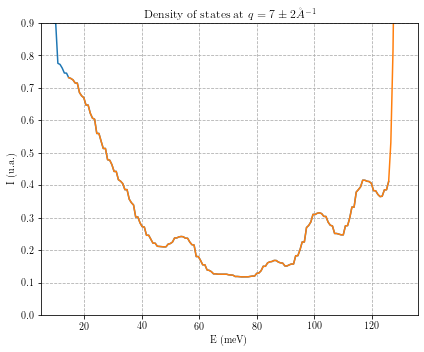

In [52]:
fig =plt.figure(figsize=(6, 5))
plt.grid(linestyle='--')
plt.title('Density of states at $q = 7 \pm 2 \AA ^{-1}$')  
plt.ylabel('I (u.a.)')
plt.xlabel('E (meV)')
plt.plot(E_arr, S_int)
plt.plot(E_plot, S_spline)
plt.xlim([5,136])
plt.ylim([0,0.9])
plt.tight_layout()
plt.show()
